In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbs
from scipy.io import loadmat

In [4]:
data=loadmat("E:\Python\PracticleData\ex7data1.mat")

In [5]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

In [11]:
X=data['X']
x1=X[:,0]
x2=X[:,1]

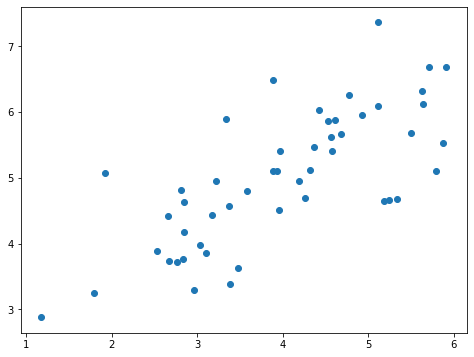

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x1,x2)

In [14]:
def pca(X):  
    # normalize the features
    X = (X - X.mean()) / X.std()

    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]

    # perform SVD=Singular value Decomposition
    U, S, V = np.linalg.svd(cov) #linearAlgebra

    return U, S, V          #U for eigen vector

In [15]:
U,S,V=pca(X)

In [16]:
#project data
def project_data(X, U, k):  
    U_reduced = U[:,:k] 
    return np.matrix(X) * U_reduced

In [17]:
z=project_data(X,U,1)

In [20]:
z.shape

(50, 1)

In [21]:
def recover_data(Z, U, k):  
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [26]:
X_recovered=recover_data(z,U,1)

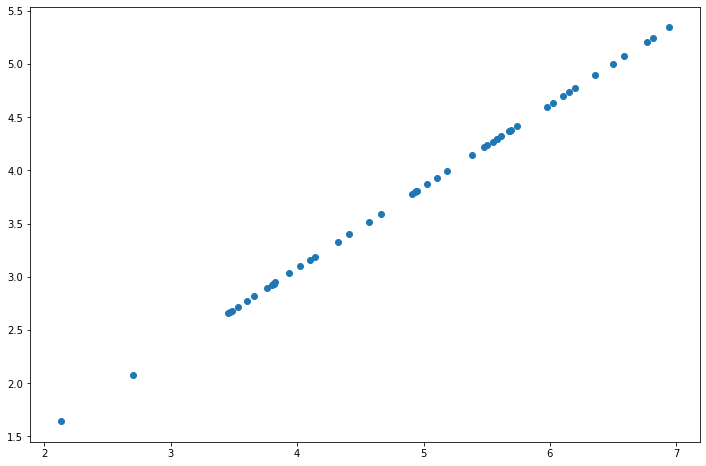

In [27]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(np.array(X_recovered[:, 0]), np.array(X_recovered[:, 1]))

In [28]:
data1=loadmat("E:\Python\PracticleData\ex7faces.mat")

In [30]:
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
         -111.86631387,  -99.86631387],
        [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
           -8.86631387,    0.13368613],
        [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
         -111.86631387, -111.86631387],
        ...,
        [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
           80.13368613,   59.13368613],
        [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
          -41.86631387,  -46.86631387],
        [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
           17.13368613,   18.13368613]])}

In [44]:
X1=data1['X']
#x11=X[:,0]
#x12=X[:,1]

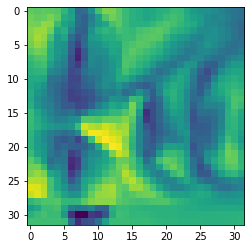

In [45]:
face = np.reshape(X1[5,:], (32, 32))  
plt.imshow(face)

In [43]:
X1.shape

(50, 2)

In [50]:
U, S, V = pca(X1)  
Z = project_data(X1, U, 100)

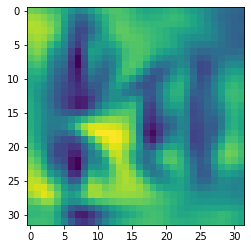

In [51]:
X_recovered = recover_data(Z, U, 100)  
face = np.reshape(X_recovered[5,:], (32, 32))  
plt.imshow(face)